In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

d = pd.read_excel('./copied_data.xlsx')
display(d.shape, d.head(5), d.tail(5))

(255, 1)

,"Hires, quits, and layoff rates, 2000–2021"
0,From https://www.epi.org/indicators/jolts/
1,NaN
2,"Date ""Hires "" ""Quits "" ""Layoffs"""
3,"2000-12-01 ""4.1"" ""2.2"" ""1.5"""
4,"2001-01-01 ""4.3"" ""2.4"" ""1.7"""


,"Hires, quits, and layoff rates, 2000–2021"
250,"2021-07-01 ""4.6"" ""2.7"" ""1.0"""
251,"2021-08-01 ""4.3"" ""2.9"" ""0.9"""
252,NaN
253,Notes: Shaded areas denote recessions. The hir...
254,Source: EPI analysis of Bureau of Labor Statis...


In [49]:
d = d.iloc[3:-3,].reset_index(drop=True)
d.rename(columns={d.iloc[3:-3,].columns[0]: 'col'}, inplace=True)
d['id'] = d.col.apply(lambda x: x[0:10])
d['hire_rate'] = d.col.apply(lambda x: float(x[13:16]))
d['quit_rate'] = d.col.apply(lambda x: float(x[20:23]))
d['layoff_rate'] = d.col.apply(lambda x: float(x[27:30]))
d['yyyymm'] = d.id.apply(lambda x: str(x)[0:7].replace('-',''))
d = d.iloc[:,1:].set_index('id')
# d['is_after'] = d.yyyymm.apply(lambda x: True if int(x[0:4])>2010 else False) 
# d = d[d.is_after==True].reset_index()
# display(d.shape, d.head(6), d.tail(6))

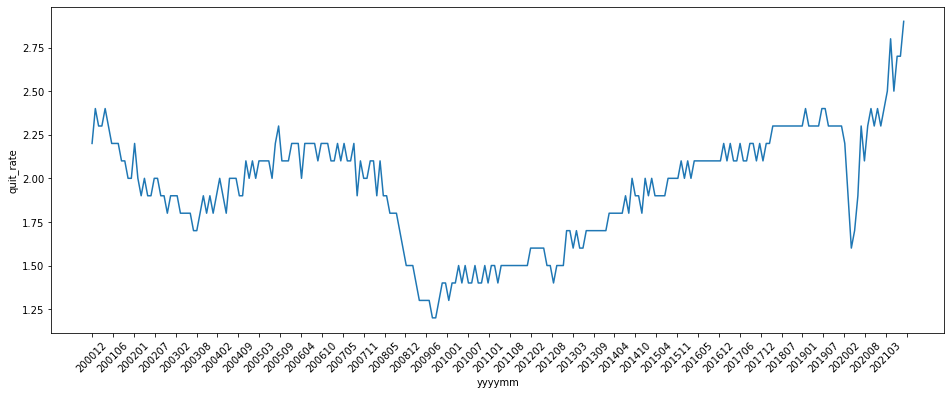

In [54]:
fig, axes = plt.subplots(figsize=(16,6))
axes.set(xticks=np.linspace(0,len(d),40))
sns.lineplot(x='yyyymm', y='quit_rate', data=d)
plt.xticks(rotation=45)
plt.show()